In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(889, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [5]:
df.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
884     NaN
885     B42
886     NaN
887    C148
888     NaN
Name: Cabin, Length: 889, dtype: object

In [6]:
df.shape

(889, 11)

<AxesSubplot:ylabel='Frequency'>

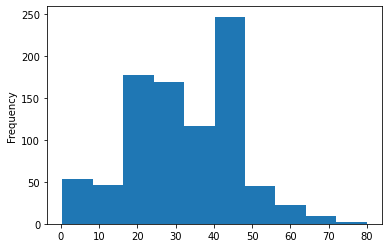

In [7]:
df['Age'].plot.hist()

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace= True)

In [9]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
df["Embarked"].fillna(value='S',inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


In [15]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

df["Sex"] = lab.fit_transform(df["Sex"])
df["Embarked"] = lab.fit_transform(df["Embarked"])

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [17]:
eda =  pd.read_csv('Dataset/train.csv')

In [18]:
eda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


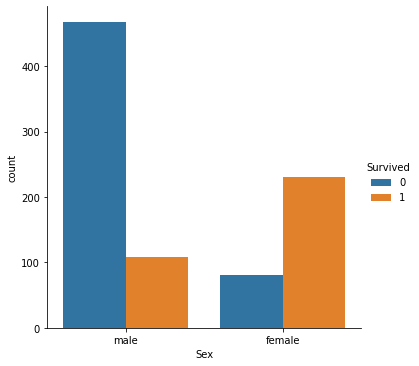

In [19]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = eda)

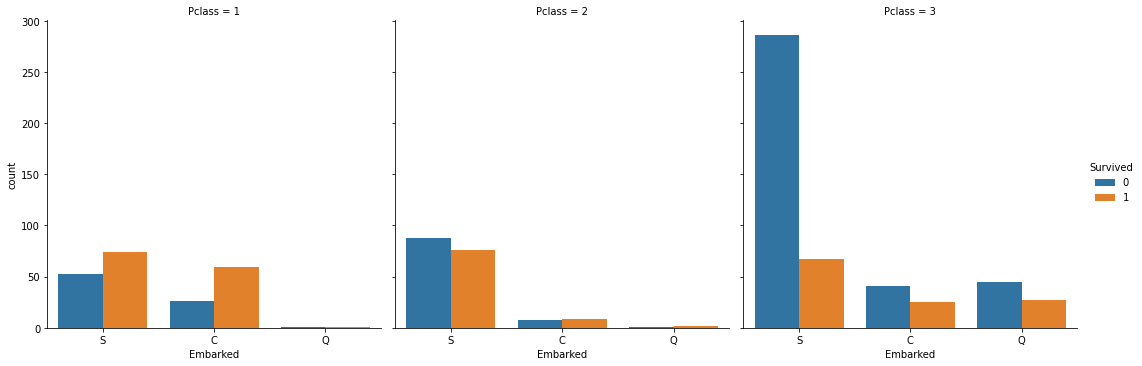

In [20]:
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data =eda)

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

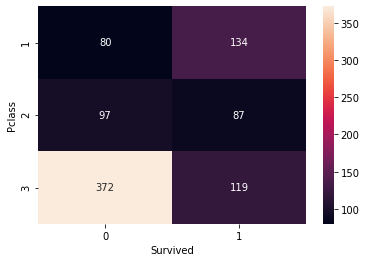

In [21]:
# Group the dataset by Pclass and Survived and then unstack them 

group = eda.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 

# Heatmap - Color encoded 2D representation of data. 

sns.heatmap(pclass_survived, annot = True, fmt ="d")

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [23]:
y = df.iloc[:,:1]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [24]:
X = df.drop(["Survived"],axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [25]:
model = tree.DecisionTreeClassifier(max_depth=14)

In [26]:
model.fit(X,y)

DecisionTreeClassifier(max_depth=14)

In [27]:
model.score(X,y)

0.96962879640045

In [28]:
rf = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)

In [29]:
rf.fit(X,y)

RandomForestClassifier(max_features=2, n_estimators=1000, oob_score=True)

In [30]:
rf.oob_score_

0.8031496062992126

In [31]:
a = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']
for feature,imp in zip(a, rf.feature_importances_):
    print(feature,"\t :",imp)

Pclass 	 : 0.08636906681897019
Sex 	 : 0.26180746437456887
Age 	 : 0.2566096873700589
SibSp 	 : 0.051730755922270076
Parch 	 : 0.039286571807156195
Fare 	 : 0.26890135615752647
Embarked 	 : 0.03529509754944943


In [32]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [33]:
x = df[['Age', 'Sex', 'Fare','Pclass']]
x.head()

,Age,Sex,Fare,Pclass
0,22.0,1,7.2500,3
1,38.0,0,71.2833,1
2,26.0,0,7.9250,3
3,35.0,0,53.1000,1
4,35.0,1,8.0500,3


In [34]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [35]:
model = tree.DecisionTreeClassifier(max_depth=8)
model.fit(x,y)

DecisionTreeClassifier(max_depth=8)

In [36]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [37]:
with open('dt2.dot','w') as f:
    f = tree.export_graphviz(model, feature_names=['Age', 'Sex', 'Fare','Pclass'], out_file=f)

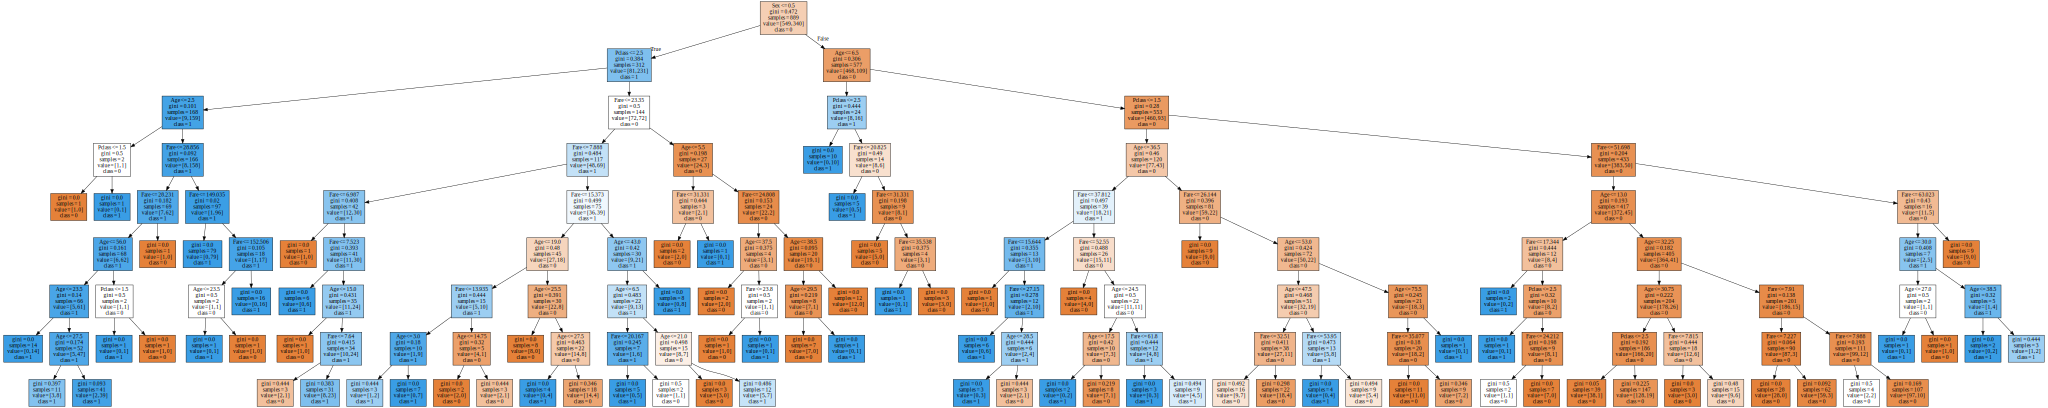

In [38]:
graph = Source(tree.export_graphviz(model, out_file=None, feature_names=['Age', 'Sex', 'Fare','Pclass'],
                                    class_names=['0','1'] , filled = True))
display(SVG(graph.pipe(format='svg')))

In [39]:
model.score(x,y)

0.8965129358830146

In [40]:
rf.fit(x,y)

RandomForestClassifier(max_features=2, n_estimators=1000, oob_score=True)

In [41]:
rf.oob_score_

0.8155230596175478

In [42]:
test_df = pd.read_csv('Dataset/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [43]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [44]:
df2 = test_df.drop(['Name','PassengerId','Ticket'],axis=1)

In [45]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [46]:
df2['Age'].fillna(df2['Age'].mean(), inplace=True)
df2['Fare'].fillna(df2['Fare'].mean(), inplace=True)

In [47]:
le = LabelEncoder()

df2["Sex"] = le.fit_transform(df2["Sex"])
df2["Embarked"] = le.fit_transform(df2["Embarked"])

In [48]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [49]:
imp = df2[['Age', 'Sex', 'Fare','Pclass']]
imp.head()

,Age,Sex,Fare,Pclass
0,34.5,1,7.8292,3
1,47.0,0,7.0000,3
2,62.0,1,9.6875,2
3,27.0,1,8.6625,3
4,22.0,0,12.2875,3


In [50]:
y_pred = model.predict(imp)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [51]:
result = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_pred })
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
412,1305,0
413,1306,1
414,1307,0
415,1308,0


In [52]:
result.to_csv('TitanicPrediction.csv', index=False)

In [53]:
output = pd.read_csv('TitanicPrediction.csv')
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
